<a href="https://colab.research.google.com/github/PaulGeorge124/CSST102-3B/blob/main/3B_PONCE_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

## **Data Exploration and Preprocessing**

In [5]:

print("First 10 rows:")
print(df.head(10))

print("\nMissing values:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
print(df.describe())


First 10 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760  

In [6]:
# 1. Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'])  # Drop 'id' and 'Unnamed: 32'

# 2. Convert the 'diagnosis' column from categorical to numerical
# M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. Normalize or Standardize the features (optional)
# We exclude the 'diagnosis' column (which is the target) during scaling
features = df.drop(columns=['diagnosis'])  # Features only, excluding the target

# Standardizing the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back
df_scaled['diagnosis'] = df['diagnosis']

# Display the first few rows of the scaled DataFrame
print("\nProcessed DataFrame (First 10 rows):")
print(df_scaled.head(10))

# Check if everything looks fine, e.g., no missing values, and all columns scaled correctly
print("\nCheck for missing values:")
print(df_scaled.isnull().sum())


Processed DataFrame (First 10 rows):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   
5    -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6     1.170908      0.160649        1.138125   1.095295        -0.123136   
7    -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8    -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9    -0.473535      1.105439       -0.329482  -0.509063         1.582699   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.

# **Splitting Data**

In [8]:
# Separate features and target
X = df_scaled.drop(columns=['diagnosis'])  # Features
y = df_scaled['diagnosis']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


# **Model Implementation**

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN Confusion Matrix:


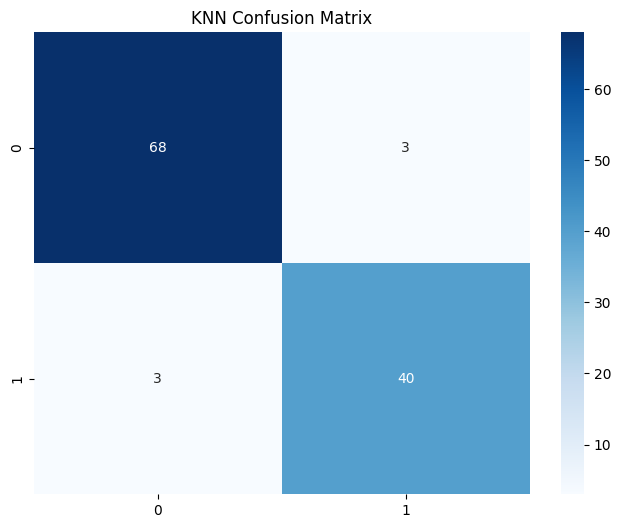

In [10]:

# Make predictions
knn_predictions = knn.predict(X_test)

# Evaluate KNN model
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("KNN Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


# **Model Evaluation**

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN Confusion Matrix:


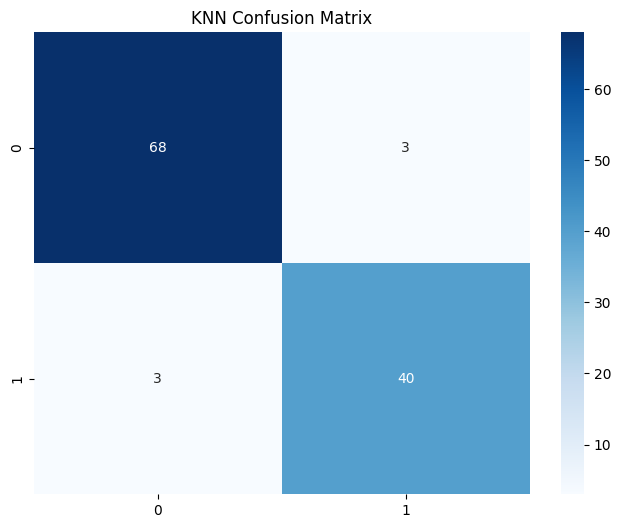

In [11]:

# Make predictions
knn_predictions = knn.predict(X_test)

# Evaluate KNN model
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("KNN Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


# **Report and Visualization**

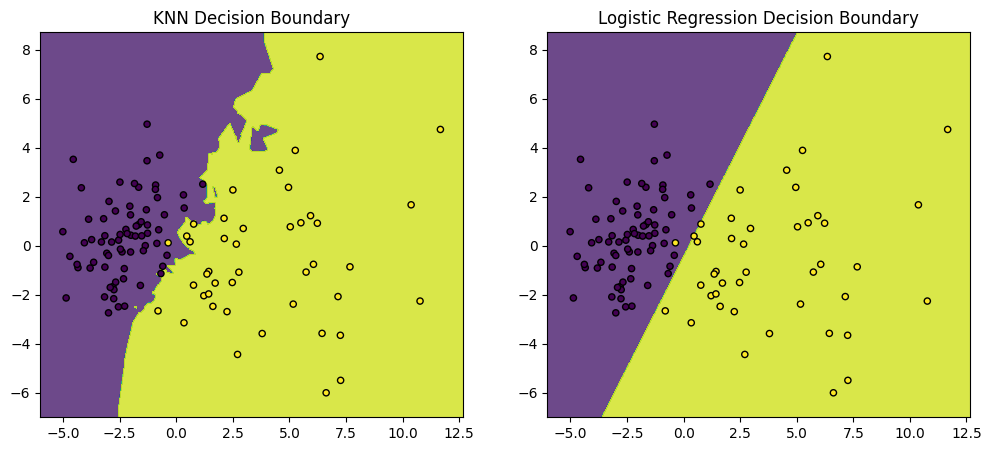

In [15]:
# Reduce dimensions
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train models
knn.fit(X_train_pca, y_train_pca)

# Initialize LogisticRegression
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
log_reg = LogisticRegression() # Create an instance of LogisticRegression

log_reg.fit(X_train_pca, y_train_pca)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20)
    ax.set_title(f'{model.__class__.__name__} Decision Boundary')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(knn, X_test_pca, y_test_pca, axes[0])
plot_decision_boundary(log_reg, X_test_pca, y_test_pca, axes[1])
axes[0].set_title('KNN Decision Boundary')
axes[1].set_title('Logistic Regression Decision Boundary')
plt.show()